# First Program

## Step1- Import Libraries
Let's import some libraries to get started!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Step2- Create the Data

#### We will use the same data for the train and for the test

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


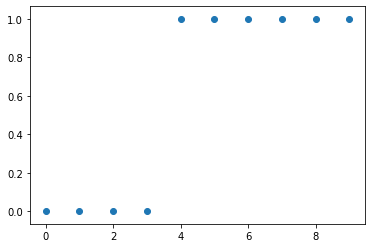

In [4]:
plt.scatter(x,y)

## Step 3- Build a Logistic Regression model for classification

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

## Step 4- Train the model

In [6]:
model.fit(x, y)

LogisticRegression()

In [7]:
# Retrouver les coefficients et l'ordonnée à l'origine
print(model.coef_)
print(model.intercept_)

[[1.18109091]]
[-4.12617727]


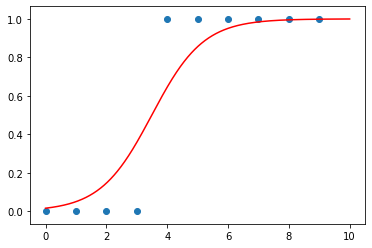

In [8]:
ordonne = np.linspace(0,10,1000)
plt.scatter(x,y)
plt.plot(ordonne,1/(1+np.exp(-model.coef_[0][0]*ordonne-model.intercept_[0])),color='r')

## Step 5- Evaluation

In [9]:
y_predict = model.predict(x)
print(y_predict)

[0 0 0 0 1 1 1 1 1 1]


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y, y_predict)

array([[4, 0],
       [0, 6]], dtype=int64)

In [11]:
tn, fp, fn, tp = confusion_matrix(y, y_predict).ravel() #for flattened output
print(tn,fp,fn,tp)

4 0 0 6


In [12]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Step 6- ROC Curve
#### Première méthode

C:\Users\mdpfayro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


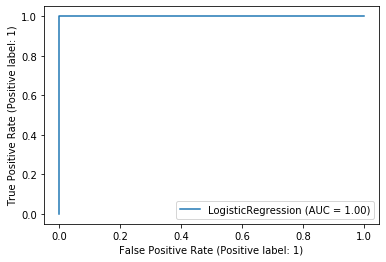

In [13]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x, y)
plt.show()

## Step 6- ROC Curve
#### Deuxième méthode

In [14]:
model.predict_proba(x)

array([[0.98411203, 0.01588797],
       [0.95003074, 0.04996926],
       [0.85370936, 0.14629064],
       [0.64173546, 0.35826454],
       [0.35475873, 0.64524127],
       [0.1443924 , 0.8556076 ],
       [0.04924876, 0.95075124],
       [0.01565079, 0.98434921],
       [0.00485659, 0.99514341],
       [0.00149573, 0.99850427]])

In [15]:
y_test_predict_probs = model.predict_proba(x)[:,1] #Gives the prob for each target class
# we just need the prob for the class 1
print(y_test_predict_probs)

[0.01588797 0.04996926 0.14629064 0.35826454 0.64524127 0.8556076
 0.95075124 0.98434921 0.99514341 0.99850427]


[0. 0. 0. 1.] [0.         0.16666667 1.         1.        ] [1.99850427 0.99850427 0.64524127 0.01588797]


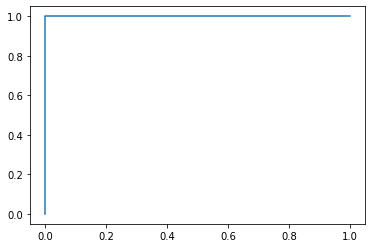

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score 
fpr, tpr, thresholds = roc_curve(y, y_test_predict_probs) 
print(fpr,tpr,thresholds)
plt.plot(fpr, tpr)

In [17]:
test_auc_roc = roc_auc_score(y, y_test_predict_probs)
print('Testing AUC: ', test_auc_roc)

Testing AUC:  1.0


In [18]:
from numpy import argmax
best = tpr - fpr
print(best)
ix = argmax(best)
best_threshold = thresholds[ix]
print('Best Threshold = ', best_threshold)

[0.         0.16666667 1.         0.        ]
Best Threshold =  0.6452412693565707
